# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
print("Hello World!")


Hello World!


In [14]:
import numpy as np
import matplotlib.pyplot as plt

## 3.2.3 계단 함수의 그래프

Text(0, 0.5, 'y')

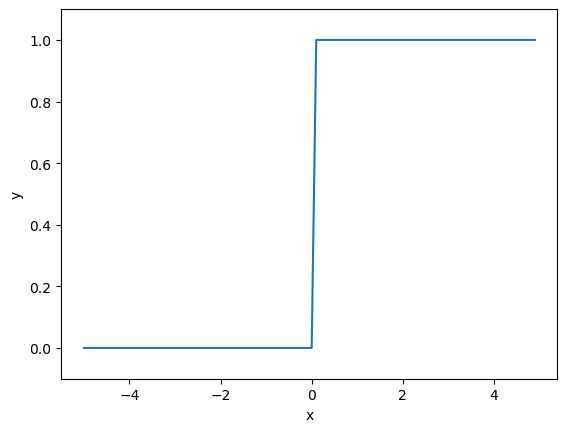

In [4]:
# step_function.py
def step_function(x):
    return np.array(x > 0, dtype=int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.xlabel('x')
plt.ylabel('y')

## 3.2.4 시그모이드 함수 구현하기

Text(0, 0.5, 'y')

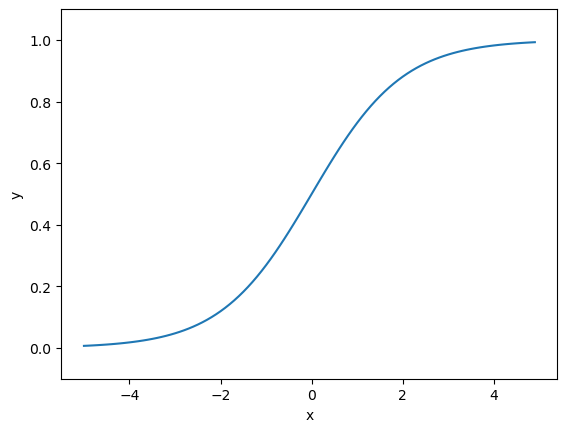

In [5]:
# sigmoid.py
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')

## 3.2.5 시그모이드 함수와 계단 함수 비교

Text(0, 0.5, 'y')

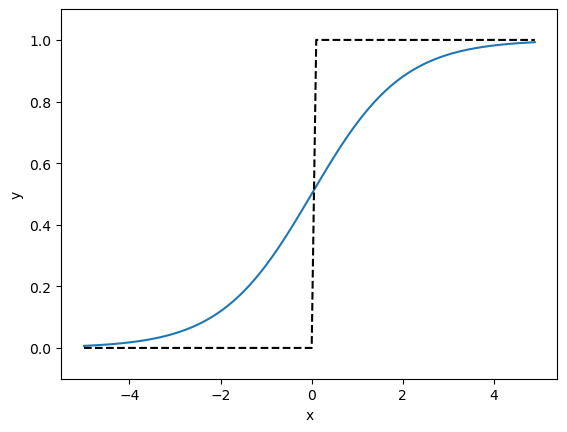

In [8]:
# sig_step_compare.py

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.xlabel('x')
plt.ylabel('y')

## 3.2.7 ReLU 함수

Text(0.5, 0, 'y')

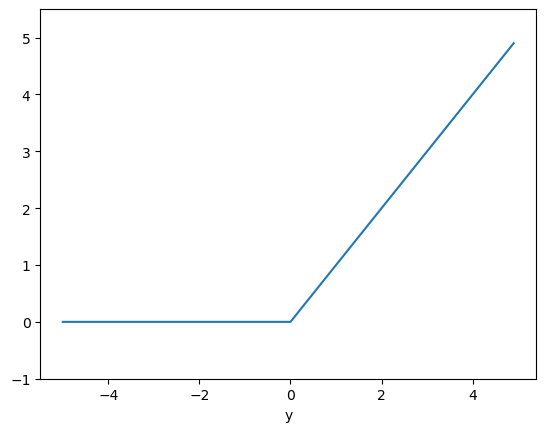

In [9]:
# relu.py
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.xlabel('x')
plt.xlabel('y')

## 3.4 3층 신경망 구현하기

In [17]:
!pip install IPython


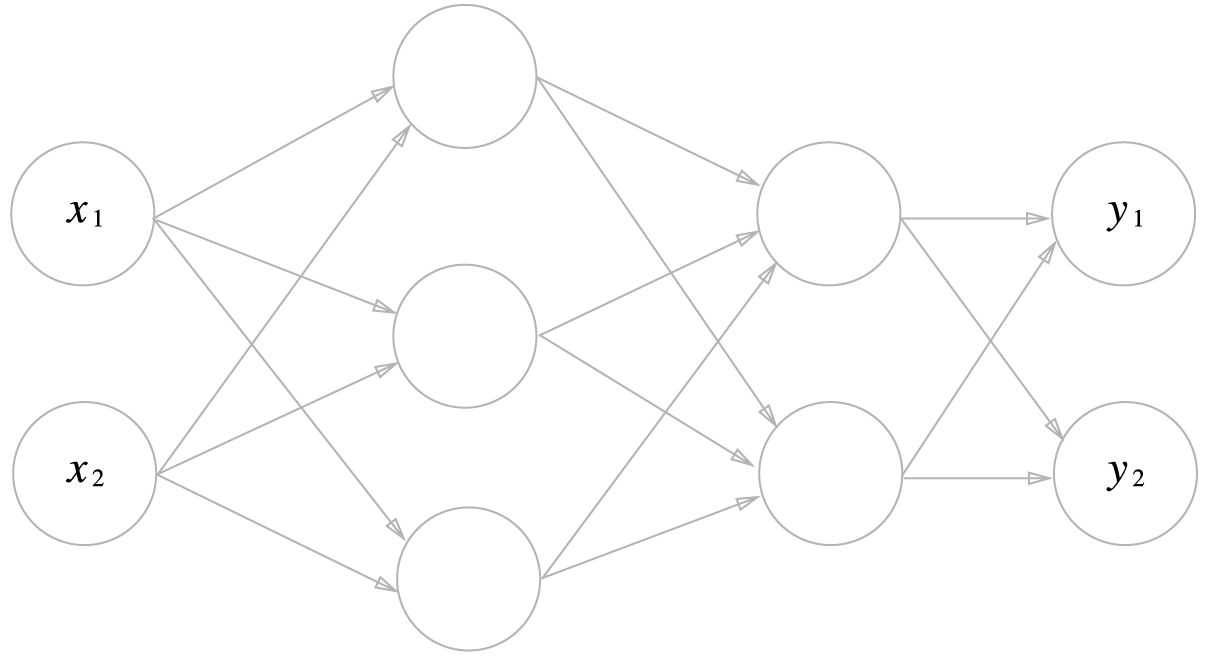

In [14]:
from IPython.display import Image
Image("neural.png")

In [15]:
# 입력층 -> 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

a1 = np.dot(X, W1) + b1     # dimension check: (1x2)(2x3) -> (1x3)
z1 = sigmoid(a1)
print(z1)

[0.57444252 0.66818777 0.75026011]


In [16]:
# 1층 -> 2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

a2 = np.dot(z1, W2) + b2   # dimension check: (1x3)(3x2) -> (1x2) 
z2 = sigmoid(a2)
print(z2)

[0.62624937 0.7710107 ]


In [17]:
# 2층 -> 출력층
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 = np.dot(z2, W3) + b3   # dimension check: (1x2)(2x2) -> (1x2) 
y = a3
print(y)

[0.31682708 0.69627909]


## 3.6.1 손글씨 데이터셋
* http://yann.lecun.com/exdb/mnist/
* a digit -> a 28x28 image
* 60,000 training images
* 10,000 test images

5
(784,)
(28, 28)


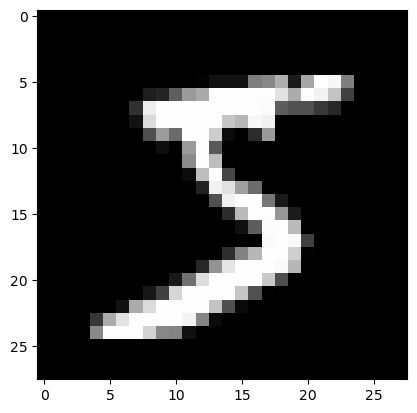

In [1]:
# mnist_show.py
import sys

#sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from PIL import Image
from IPython.display import display # to display images


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    display(pil_img)  # display image in a notebook (https://stackoverflow.com/a/50723518)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

plt.imshow(img, cmap='gray')
img_show(img)   #작은 크기

## 3.6.2 신경망의 추론 처리

In [2]:
# neuralnet_mnist.py
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [3]:
network = init_network()
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)

(784, 50)
(50, 100)
(100, 10)


[8.4412568e-05 2.6350654e-06 7.1549520e-04 1.2586274e-03 1.1727955e-06
 4.4990895e-05 1.6269318e-08 9.9706501e-01 9.3744884e-06 8.1831269e-04]
7


<BarContainer object of 10 artists>

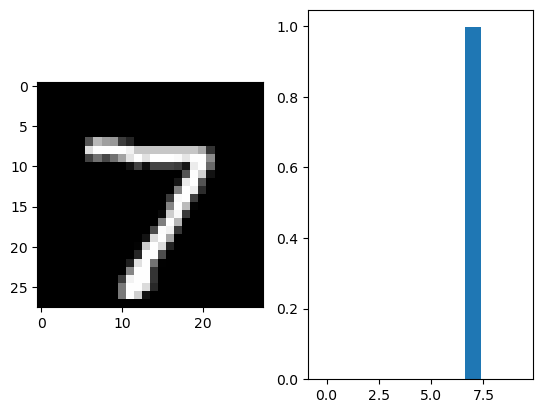

In [4]:
# load data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

# predict the 1st sample
y = predict(network, x_test[0])
print(y)
print(t_test[0])


plt.subplot(121)
plt.imshow(x_test[0].reshape(28,28),cmap='gray')
plt.subplot(122)
plt.bar(range(10), y)

## 3.6.3 배치 처리

In [5]:
%%time
# neuralnet_mnist_batch.py
batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    pred = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(pred == t_test[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9352
CPU times: total: 15.6 ms
Wall time: 22 ms


In [6]:
x_test.shape

(10000, 784)

In [7]:
x_batch.shape, y_batch.shape

((100, 784), (100, 10))

In [11]:
pred.shape

(100,)